In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = "../data/eric_ingressgw_udm_traffic_cpu_time_series_lk5nv.csv"

# Load the CSV file into a Pandas DataFrame
time_series_cpu_lk5nv = pd.read_csv(file_path)

# Display the first few rows of the data
print(time_series_cpu_lk5nv.head())


time_series_cpu_lk5nv = pd.read_csv(file_path, header=None, names=["Time Start", "Cluster", "CPU Utilization (%)"])
print(time_series_cpu_lk5nv.info())
print(time_series_cpu_lk5nv.describe())

/home/ecerocg/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


            Time Start                 Cluster  CPU Utilization (%)
0  2024-11-06 15:05:00  capo-28037-pool1-lk5nv                14.49
1  2024-11-06 15:10:00  capo-28037-pool1-lk5nv               161.18
2  2024-11-06 15:15:00  capo-28037-pool1-lk5nv               404.35
3  2024-11-06 15:20:00  capo-28037-pool1-lk5nv               521.99
4  2024-11-06 15:25:00  capo-28037-pool1-lk5nv               556.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Time Start           11 non-null     object
 1   Cluster              11 non-null     object
 2   CPU Utilization (%)  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes
None
        Time Start                 Cluster  CPU Utilization (%)
count           11                      11                   11
unique          11                       2                   11
top

In [2]:
# Ensure the DataFrame has the correct columns for Prophet
time_series_cpu_lk5nv = time_series_cpu_lk5nv[["Time Start", "CPU Utilization (%)"]].copy()
time_series_cpu_lk5nv.columns = ["ds", "y"]  # Rename columns for Prophet

# Ensure datetime format for 'ds'
time_series_cpu_lk5nv["ds"] = pd.to_datetime(time_series_cpu_lk5nv["ds"], errors='coerce')

# Ensure 'y' is numeric
time_series_cpu_lk5nv["y"] = pd.to_numeric(time_series_cpu_lk5nv["y"], errors='coerce')

# Drop rows with missing values in 'ds' or 'y'
time_series_cpu_lk5nv = time_series_cpu_lk5nv.dropna(subset=["ds", "y"])

# Display the cleaned DataFrame for validation
print(time_series_cpu_lk5nv.head())

# Initialize and fit the Prophet model
model = Prophet()
model.fit(time_series_cpu_lk5nv)





/tmp/ipykernel_11665/2837006101.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_cpu_lk5nv["ds"] = pd.to_datetime(time_series_cpu_lk5nv["ds"], errors='coerce')
13:08:52 - cmdstanpy - INFO - Chain [1] start processing
13:08:52 - cmdstanpy - INFO - Chain [1] done processing


                   ds       y
1 2024-11-06 15:05:00   14.49
2 2024-11-06 15:10:00  161.18
3 2024-11-06 15:15:00  404.35
4 2024-11-06 15:20:00  521.99
5 2024-11-06 15:25:00  556.94


Forecast next 10 minutes: 

/home/ecerocg/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(


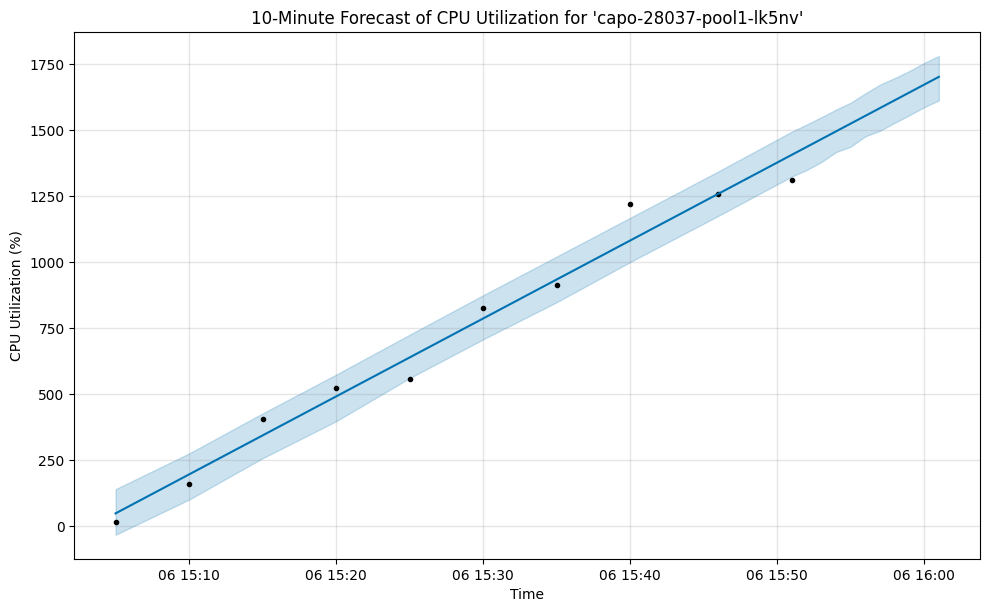

                    ds         yhat   yhat_lower   yhat_upper
10 2024-11-06 15:52:00  1435.644579  1348.364349  1520.647463
11 2024-11-06 15:53:00  1465.152985  1378.381956  1548.088379
12 2024-11-06 15:54:00  1494.661391  1416.267593  1577.058220
13 2024-11-06 15:55:00  1524.169796  1436.756953  1603.422357
14 2024-11-06 15:56:00  1553.678202  1476.084034  1638.561169
15 2024-11-06 15:57:00  1583.186608  1497.092645  1671.953760
16 2024-11-06 15:58:00  1612.695014  1527.300803  1696.586594
17 2024-11-06 15:59:00  1642.203420  1556.113993  1723.429646
18 2024-11-06 16:00:00  1671.711826  1586.301192  1753.765033
19 2024-11-06 16:01:00  1701.220232  1611.984026  1780.386511


In [3]:
# Create a future dataframe for the next 10 minutes
future = model.make_future_dataframe(periods=10, freq='T')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("10-Minute Forecast of CPU Utilization for 'capo-28037-pool1-lk5nv'")
plt.xlabel("Time")
plt.ylabel("CPU Utilization (%)")
plt.show()

# Display forecast results for the next 10 minutes
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10))
